In [1]:
import skimage.io
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(806, 1200)


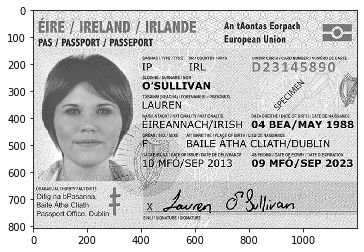

In [4]:
# load image as grayscale
img = skimage.io.imread("images/irish_passport.jpg")
img = skimage.color.rgb2gray(img)
plt.imshow(img,cmap='gray')
print(img.shape)

In [5]:
def apply_convolution(image,kernel):
    input_shape = (1,image.shape[0],image.shape[1],1) # params: batch size, height, width, num_channels
    input_placeholder = tf.placeholder(dtype=tf.float32, shape=input_shape)
    image_4d = image[np.newaxis, :,:,np.newaxis]
    with tf.name_scope("convolution"):
        conv_w = tf.constant(kernel,dtype=tf.float32,
                             shape=(3,3,1,1)) # height, width, num of channels in the input image (grayscale = 1), num of channels in output image
        output = tf.nn.conv2d(input=input_placeholder,
                             filter = conv_w,
                             strides=[1,1,1,1],
                             padding="SAME")
        with tf.Session() as sess:
            result = sess.run(output,
                             feed_dict={input_placeholder:image_4d})
        return result

In [6]:
def display_original_convolution_result(image,result):
    fig, axes = plt.subplots(1,2,
                            figsize=(10,10),
                            sharex=True,sharey=True)
    ax = axes.ravel()
    ax[0].imshow(image,cmap='gray')
    ax[1].imshow(result[0,:,:,0],cmap='gray')
    plt.tight_layout()
    plt.show()

## Apply Gaussian blur

In [8]:
kernel_gaussianblur = [ [1/16,2/16,1/16],
                        [2/16,4/16,2/16],
                        [1/16,2/16,1/16],
                      ]

In [9]:
result = apply_convolution(img, kernel_gaussianblur)

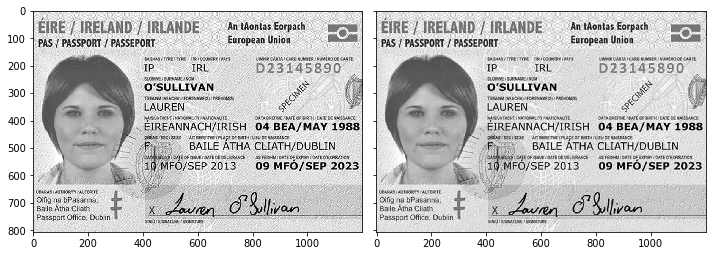

In [10]:
display_original_convolution_result(img,result)

## Apply image sharpening

In [12]:
kernel_sharpen = [ [0,-1,0],
                   [-1,5,-1],
                   [0,-1,0],
                 ]

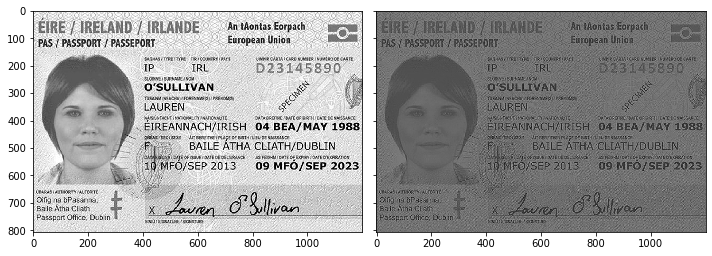

In [13]:
sharpen_result = apply_convolution(img, kernel_sharpen)
display_original_convolution_result(img,sharpen_result)

## Horizontal Line Detection

In [14]:
kernel_horizontal = [ [-1,-2,-1],
                       [0,0,0],
                       [1,2,1],
                     ]

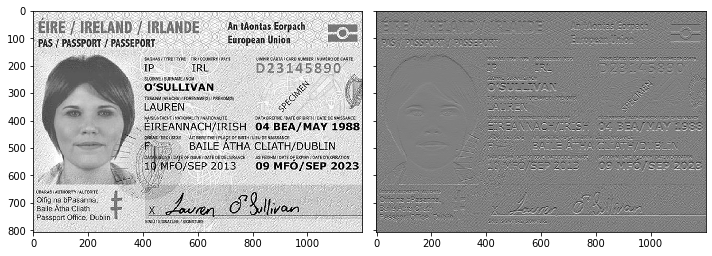

In [15]:
horizontal_result = apply_convolution(img, kernel_horizontal)
display_original_convolution_result(img,horizontal_result)

## Vertical Line Detection

In [16]:
kernel_vertical = [ [-1,0,1],
                       [-2,0,2],
                       [-1,0,1],
                     ]

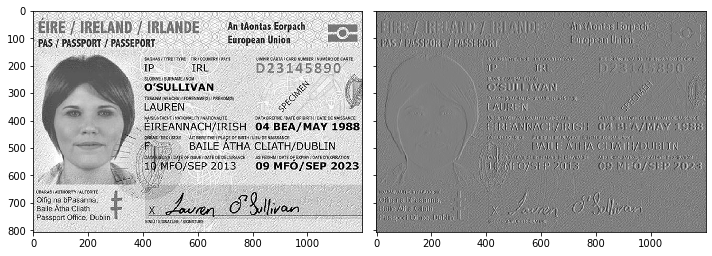

In [17]:
vertical_result = apply_convolution(img, kernel_vertical)
display_original_convolution_result(img,vertical_result)

## Detect lines at 45 degrees

In [24]:
kernel_diagonal = [ [-1,-1,2],
                    [-1,2,-1],
                    [2,-1,-1],
         ]

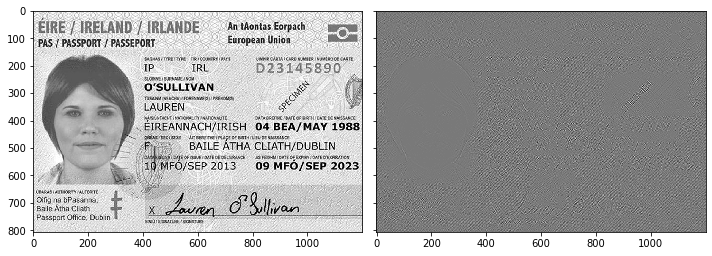

In [25]:
diagonal_result = apply_convolution(img, kernel_diagonal)
display_original_convolution_result(img,diagonal_result)

## kernel for edge detection

In [28]:
kernel_edge = [ [-1,-1,-1],
                [-1,8,-1],
                [-1,-1,-1],
         ]

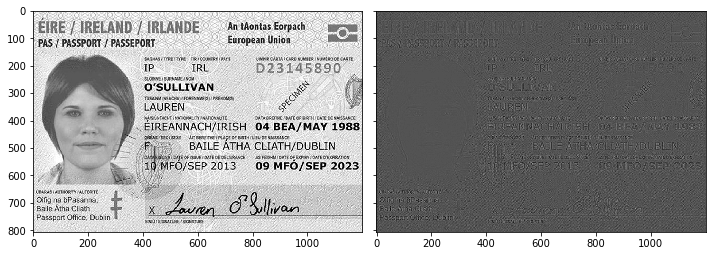

In [29]:
edge_result = apply_convolution(img, kernel_edge)
display_original_convolution_result(img,edge_result)